DATASETS

1. World Bank Open Data - Forest coverage (API)
2. UN Data - Population by sex and urban/rural residence between 2000 - 2020 (csv)
3. Food and Agriculture Organization of the United Nations (FAO) - FAOSTAT (csv)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

To access the World Bank Open Data API using Python, we installed the wbdata library

In [2]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


Imported the data and looked at timeframe, countries and created the dataframe

In [3]:
import wbdata
import pandas as pd
import datetime 

# Set the indicator code for forest coverage
indicator_code = 'AG.LND.FRST.ZS'

# Set the start and end year for the data
start_year = 2000
end_year = 2020

# Set the countries to retrieve data for
countries = ['USA', 'CAN', 'MEX']

# Retrieve the data
start_date = datetime.datetime(start_year, 1, 1)
end_date = datetime.datetime(end_year, 12, 31)

forest_data = wbdata.get_data(indicator_code, country=countries, data_date=(start_date, end_date))

# Convert the data to a pandas DataFrame
df = pd.DataFrame(forest_data)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator        63 non-null     object 
 1   country          63 non-null     object 
 2   countryiso3code  63 non-null     object 
 3   date             63 non-null     object 
 4   value            63 non-null     float64
 5   unit             63 non-null     object 
 6   obs_status       63 non-null     object 
 7   decimal          63 non-null     int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 4.1+ KB


In [4]:
df.head()


,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'CA', 'value': 'Canada'}",CAN,2020,38.695513,,,1
1,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'CA', 'value': 'Canada'}",CAN,2019,38.699637,,,1
2,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'CA', 'value': 'Canada'}",CAN,2018,38.703763,,,1
3,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'CA', 'value': 'Canada'}",CAN,2017,38.707888,,,1
4,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'CA', 'value': 'Canada'}",CAN,2016,38.712013,,,1


checking average forest coverage for selected countries

In [5]:

# Calculate the average forest coverage for each country
avg_forest_coverage = df.groupby('countryiso3code')['value'].mean()

# Print the average forest coverage for each country
print('Average forest coverage by country:')
print(avg_forest_coverage)


Average forest coverage by country:
countryiso3code
CAN    38.741693
MEX    34.463532
USA    33.631871
Name: value, dtype: float64


checking min and max coverage 

In [6]:

# Determine which country has the highest and lowest forest coverage
max_coverage = df.loc[df['value'].idxmax()]
min_coverage = df.loc[df['value'].idxmin()]

# Print the country with the highest and lowest forest coverage
print(f'The country with the highest forest coverage is {max_coverage["country"]} with a coverage of {max_coverage["value"]:.2f}%.')
print(f'The country with the lowest forest coverage is {min_coverage["country"]} with a coverage of {min_coverage["value"]:.2f}%.')

# Determine if any country has seen significant increases or decreases in forest coverage during the specified time period
for country in countries:
    country_data = df.loc[df['countryiso3code'] == country]
    initial_coverage = country_data.loc[country_data['date'] == str(start_year)]['value'].values[0]
    final_coverage = country_data.loc[country_data['date'] == str(end_year)]['value'].values[0]
    change = final_coverage - initial_coverage
    if abs(change) > 5:
        if change > 0:
            print(f'{country} has seen a significant increase in forest coverage of {change:.2f}% between {start_year} and {end_year}.')
        else:
            print(f'{country} has seen a significant decrease in forest coverage of {change:.2f}% between {start_year} and {end_year}.')




The country with the highest forest coverage is {'id': 'CA', 'value': 'Canada'} with a coverage of 38.79%.
The country with the lowest forest coverage is {'id': 'US', 'value': 'United States'} with a coverage of 33.13%.


In [7]:
# Retrieve the global forest coverage data for the specified time period
global_forest_data = wbdata.get_data(indicator_code,  data_date=(start_date, end_date))



In [8]:
global_forest_df = pd.DataFrame(global_forest_data)
global_forest_df.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal
0,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2020,30.174186,,,1
1,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2019,30.391558,,,1
2,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2018,30.611444,,,1
3,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2017,30.824248,,,1
4,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2016,31.039613,,,1


In [9]:
# Calculate the average global forest coverage for the specified time period
global_avg_forest_coverage = df['value'].mean()
print(global_avg_forest_coverage)

# Compare the average forest coverage in the selected countries to the global average
if avg_forest_coverage.mean() > global_avg_forest_coverage:
    print('The selected countries have higher than average forest coverage compared to the global average.')
elif avg_forest_coverage.mean() < global_avg_forest_coverage:
    print('The selected countries have lower than average forest coverage compared to the global average.')
else:
    print('The selected countries have average forest coverage compared to the global average.')

35.61236560761129
The selected countries have higher than average forest coverage compared to the global average.


In [10]:
pip install pycountry pycountry_convert

In [11]:
import pycountry
import pycountry_convert as pc

def country_to_continent (country_alpha2):        
    continent_code = pc.country_alpha2_to_continent_code (country_alpha2)    
    continent_name = pc.convert_continent_code_to_continent_name(continent_code)
    return continent_name

def country_name_to_continent (country_name):        
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)    
        continent_name = country_to_continent(country_code)
        return continent_name
    except:        
        pass
    

# Create a lookup table mapping country names to continents
country_name_to_continent = {}
for country in pycountry.countries:  
    try:
        continent = country_to_continent(country.alpha_2)        
        country_name_to_continent[country.name]= continent         
    except:
        pass
print(country_name_to_continent)




{'Aruba': 'North America', 'Afghanistan': 'Asia', 'Angola': 'Africa', 'Anguilla': 'North America', 'Åland Islands': 'Europe', 'Albania': 'Europe', 'Andorra': 'Europe', 'United Arab Emirates': 'Asia', 'Argentina': 'South America', 'Armenia': 'Asia', 'American Samoa': 'Oceania', 'Antigua and Barbuda': 'North America', 'Australia': 'Oceania', 'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Burundi': 'Africa', 'Belgium': 'Europe', 'Benin': 'Africa', 'Bonaire, Sint Eustatius and Saba': 'North America', 'Burkina Faso': 'Africa', 'Bangladesh': 'Asia', 'Bulgaria': 'Europe', 'Bahrain': 'Asia', 'Bahamas': 'North America', 'Bosnia and Herzegovina': 'Europe', 'Saint Barthélemy': 'North America', 'Belarus': 'Europe', 'Belize': 'North America', 'Bermuda': 'North America', 'Bolivia, Plurinational State of': 'South America', 'Brazil': 'South America', 'Barbados': 'North America', 'Brunei Darussalam': 'Asia', 'Bhutan': 'Asia', 'Bouvet Island': 'Antarctica', 'Botswana': 'Africa', 'Central African Republic':

In [12]:
def country_code_to_name (row):
    code = row ['countryiso3code']
    try:
        return pycountry.countries.get(alpha_3=code).name
    except:
        pass

global_forest_df['country_name']=global_forest_df.apply(lambda row:country_code_to_name(row), axis=1)
global_forest_df.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal,country_name
0,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2020,30.174186,,,1,None
1,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2019,30.391558,,,1,None
2,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2018,30.611444,,,1,None
3,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2017,30.824248,,,1,None
4,"{'id': 'AG.LND.FRST.ZS', 'value': 'Forest area...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2016,31.039613,,,1,None


In [13]:
x=global_forest_df.filter(items=['country_name','date','value'])
x.head()

forest_valid_countries = x[x['country_name'].isin(country_name_to_continent.keys())]


forest_valid_countries.head()

,country_name,date,value
1029,Afghanistan,2020,1.852782
1030,Afghanistan,2019,1.852782
1031,Afghanistan,2018,1.852782
1032,Afghanistan,2017,1.852782
1033,Afghanistan,2016,1.852782


In [14]:
# add continent data to dataframe

forest_valid_countries['continent'] = forest_valid_countries['country_name'].map(country_name_to_continent)

avg_forest_coverage_by_continent = forest_valid_countries.groupby('continent')['value'].mean()
print(avg_forest_coverage_by_continent)
global_forest_df.info()

continent
Africa           28.969330
Asia             22.960607
Europe           30.304611
North America    37.713132
Oceania          49.680202
South America    51.244379
Name: value, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5586 entries, 0 to 5585
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   indicator        5586 non-null   object 
 1   country          5586 non-null   object 
 2   countryiso3code  5586 non-null   object 
 3   date             5586 non-null   object 
 4   value            5420 non-null   float64
 5   unit             5586 non-null   object 
 6   obs_status       5586 non-null   object 
 7   decimal          5586 non-null   int64  
 8   country_name     4515 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 392.9+ KB


<ipython-input-14-02d9f57bdbce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forest_valid_countries['continent'] = forest_valid_countries['country_name'].map(country_name_to_continent)


UN Data on Population by sex and urban/rural residence between 2000 - 2020

In [15]:
population = pd.read_csv("population_by_sex_residence.csv", index_col = 0)
population.head()

,Year,Area,Sex,Record Type,Reliability,Source Year,Value,Value Footnotes
Country or Area,,,,,,,,
Afghanistan,2020,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2021.0,31390171.0,1
Afghanistan,2019,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2019.0,30725560.0,1
Afghanistan,2018,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2019.0,30075018.0,1
Afghanistan,2017,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2018.0,28224323.0,1
Afghanistan,2016,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2017.0,27657145.0,1


In [16]:
population.columns
population.reset_index(inplace=True)
population.columns
population.head()

,Country or Area,Year,Area,Sex,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Afghanistan,2020,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2021.0,31390171.0,1
1,Afghanistan,2019,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2019.0,30725560.0,1
2,Afghanistan,2018,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2019.0,30075018.0,1
3,Afghanistan,2017,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2018.0,28224323.0,1
4,Afghanistan,2016,Total,Both Sexes,Estimate - de facto,"Final figure, incomplete/questionable reliability",2017.0,27657145.0,1


In [48]:
population = population.filter(items=['Country or Area','Year','Reliability','Value']).loc[(population['Reliability']=='Final figure, complete')]
population['Year'] = population['Year'].astype(int)
population = population.loc[(population['Year']>=2000) & (population['Year']<2021)]
population.head()

,Country or Area,Year,Reliability
21,Åland Islands,2020,"Final figure, complete"
22,Åland Islands,2019,"Final figure, complete"
23,Åland Islands,2018,"Final figure, complete"
24,Åland Islands,2017,"Final figure, complete"
25,Åland Islands,2016,"Final figure, complete"


In [18]:
population_valid_countries = population[population['Country or Area'].isin(country_name_to_continent.keys())]
population_valid_countries.head()

,Country or Area,Year,Reliability,Value
21,Åland Islands,2020,"Final figure, complete",30005.5
22,Åland Islands,2019,"Final figure, complete",29836.5
23,Åland Islands,2018,"Final figure, complete",29638.0
24,Åland Islands,2017,"Final figure, complete",29352.0
25,Åland Islands,2016,"Final figure, complete",29099.0


In [19]:
population['continent'] = population['Country or Area'].map(country_name_to_continent)
population=population.rename(columns={'Value':'population value'})
population.head()


,Country or Area,Year,Reliability,population value,continent
21,Åland Islands,2020,"Final figure, complete",30005.5,Europe
22,Åland Islands,2019,"Final figure, complete",29836.5,Europe
23,Åland Islands,2018,"Final figure, complete",29638.0,Europe
24,Åland Islands,2017,"Final figure, complete",29352.0,Europe
25,Åland Islands,2016,"Final figure, complete",29099.0,Europe


In [20]:
population.to_csv("populationWithContinent.csv")

In [21]:
continent_population_data = population.groupby(['Year', 'continent']).sum('Value')
continent_population_data.reset_index(inplace=True)
continent_population_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              126 non-null    int64  
 1   continent         126 non-null    object 
 2   population value  126 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.1+ KB


In [22]:
continent_population_data['population value'] = (continent_population_data['population value'] / 1000000).round(2)
print(continent_population_data.values)

[[2000 'Africa' 43.53]
 [2000 'Asia' 2592.31]
 [2000 'Europe' 951.0]
 [2000 'North America' 194.5]
 [2000 'Oceania' 30.3]
 [2000 'South America' 226.86]
 [2001 'Africa' 64.12]
 [2001 'Asia' 1975.17]
 [2001 'Europe' 1297.95]
 [2001 'North America' 131.84]
 [2001 'Oceania' 70.4]
 [2001 'South America' 106.05]
 [2002 'Africa' 79.74]
 [2002 'Asia' 652.05]
 [2002 'Europe' 1287.8]
 [2002 'North America' 118.78]
 [2002 'Oceania' 25.47]
 [2002 'South America' 79.16]
 [2003 'Africa' 16.62]
 [2003 'Asia' 787.29]
 [2003 'Europe' 982.85]
 [2003 'North America' 97.1]
 [2003 'Oceania' 25.52]
 [2003 'South America' 58.67]
 [2004 'Africa' 91.31]
 [2004 'Asia' 708.17]
 [2004 'Europe' 1045.28]
 [2004 'North America' 89.85]
 [2004 'Oceania' 26.05]
 [2004 'South America' 62.76]
 [2005 'Africa' 46.74]
 [2005 'Asia' 1016.32]
 [2005 'Europe' 1096.76]
 [2005 'North America' 198.63]
 [2005 'Oceania' 26.22]
 [2005 'South America' 142.23]
 [2006 'Africa' 259.36]
 [2006 'Asia' 669.58]
 [2006 'Europe' 1072.47]
 [2

In [23]:
continent_forest_data = forest_valid_countries.groupby(['date', 'continent']).sum('value')
continent_forest_data.reset_index(inplace=True)
continent_forest_data['Year'] = continent_forest_data['date'].astype(int)
continent_forest_data=continent_forest_data.rename(columns={'value':'forest coverage'})
continent_forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             126 non-null    object 
 1   continent        126 non-null    object 
 2   forest coverage  126 non-null    float64
 3   Year             126 non-null    int32  
dtypes: float64(1), int32(1), object(2)
memory usage: 3.6+ KB


In [24]:
merged_df = pd.merge(continent_population_data, continent_forest_data, left_on=['continent','Year'], right_on=['continent', 'Year'], how='inner')
print(merged_df.shape)
merged_df.head()


(126, 5)


,Year,continent,population value,date,forest coverage
0,2000,Africa,43.53,2000,1619.809204
1,2000,Asia,2592.31,2000,1083.110889
2,2000,Europe,951.00,2000,1280.697749
3,2000,North America,194.50,2000,1205.603681
4,2000,Oceania,30.30,2000,945.163168


Third dataset on food production

In [25]:
food = pd.read_csv("food_production.csv", index_col = 0)
food.head()

C:\Users\bogla_d7nsnlv\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
Area Code,,,,,,,,,,,,
2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1975,1975,ha,0.0,E
2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1976,1976,ha,5900.0,E
2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1977,1977,ha,6000.0,E
2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1978,1978,ha,6000.0,E
2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1979,1979,ha,6000.0,E


In [26]:
filtered_food= food.filter(items=['Area','Item','Element','Year','Unit','Value','Flag']).loc[(food['Flag']=='A')& (food['Element']=='Area harvested') & (food['Year']>=2000) & (food['Year']<2021)]
food_summary=filtered_food.groupby(['Year', 'Area']).sum('Value')
food_summary.reset_index(inplace=True)
food_summary.head()


food_valid_countries = food_summary[food_summary['Area'].isin(country_name_to_continent.keys())]
print(food_valid_countries)

      Year         Area       Value
0     2000  Afghanistan   4859700.0
2     2000      Albania    461394.0
3     2000      Algeria   2845476.0
5     2000       Angola   2530960.0
6     2000    Argentina  35446241.0
...    ...          ...         ...
4000  2020      Uruguay   2483320.0
4001  2020   Uzbekistan   3378629.0
4003  2020     Viet Nam  23758596.0
4008  2020       Zambia   3595017.0
4009  2020     Zimbabwe   1885546.0

[3015 rows x 3 columns]


In [27]:
country_counts_food = food_valid_countries['Area'].value_counts()
filtered_food_valid_countries = food_valid_countries[food_valid_countries['Area'].isin(country_counts_food[country_counts_food == 21].index)]


print(filtered_food_valid_countries)

      Year         Area       Value
0     2000  Afghanistan   4859700.0
2     2000      Albania    461394.0
3     2000      Algeria   2845476.0
5     2000       Angola   2530960.0
6     2000    Argentina  35446241.0
...    ...          ...         ...
3997  2020      Ukraine  44180611.0
4000  2020      Uruguay   2483320.0
4001  2020   Uzbekistan   3378629.0
4003  2020     Viet Nam  23758596.0
4008  2020       Zambia   3595017.0

[2268 rows x 3 columns]


In [28]:

forest_valid_countries=forest_valid_countries.rename(columns={'value':'forest coverage %'})
forest_valid_countries['Year'] = forest_valid_countries['date'].astype(int)
forest_valid_countries.head()

,country_name,date,forest coverage %,continent,Year
1029,Afghanistan,2020,1.852782,Asia,2020
1030,Afghanistan,2019,1.852782,Asia,2019
1031,Afghanistan,2018,1.852782,Asia,2018
1032,Afghanistan,2017,1.852782,Asia,2017
1033,Afghanistan,2016,1.852782,Asia,2016


In [29]:
country_counts_forest = forest_valid_countries['country_name'].value_counts()
filtered_forest_countries = forest_valid_countries[forest_valid_countries['country_name'].isin(country_counts_forest[country_counts_forest == 21].index)]


print(filtered_forest_countries)


     country_name  date  forest coverage % continent  Year
1029  Afghanistan  2020           1.852782      Asia  2020
1030  Afghanistan  2019           1.852782      Asia  2019
1031  Afghanistan  2018           1.852782      Asia  2018
1032  Afghanistan  2017           1.852782      Asia  2017
1033  Afghanistan  2016           1.852782      Asia  2016
...           ...   ...                ...       ...   ...
5581     Zimbabwe  2004          46.999354    Africa  2004
5582     Zimbabwe  2003          47.118444    Africa  2003
5583     Zimbabwe  2002          47.237534    Africa  2002
5584     Zimbabwe  2001          47.356624    Africa  2001
5585     Zimbabwe  2000          47.475714    Africa  2000

[4473 rows x 5 columns]


In [30]:
filtered_forest_countries.groupby(['country_name']).count()

,date,forest coverage %,continent,Year
country_name,,,,
Afghanistan,21,21,21,21
Albania,21,21,21,21
Algeria,21,21,21,21
American Samoa,21,21,21,21
Andorra,21,21,21,21
...,...,...,...,...
"Virgin Islands, British",21,21,21,21
"Virgin Islands, U.S.",21,21,21,21
Yemen,21,21,21,21


In [31]:
food_valid_countries['continent'] = food_valid_countries['Area'].map(country_name_to_continent)
food_valid_countries=food_valid_countries.rename(columns={'Value':'Area harvested - ha'})
food_valid_countries.head()

<ipython-input-31-0d6a2627966f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_valid_countries['continent'] = food_valid_countries['Area'].map(country_name_to_continent)


,Year,Area,Area harvested - ha,continent
0,2000,Afghanistan,4859700.0,Asia
2,2000,Albania,461394.0,Europe
3,2000,Algeria,2845476.0,Africa
5,2000,Angola,2530960.0,Africa
6,2000,Argentina,35446241.0,South America


In [32]:
population_valid_countries = population_valid_countries.groupby(['Year', 'Country or Area']).mean('population value')
population_valid_countries.reset_index(inplace=True)
population_valid_countries.head()

,Year,Country or Area,Value
0,2000,Albania,3.060908e+06
1,2000,American Samoa,5.749550e+04
2,2000,Andorra,6.586533e+04
3,2000,Anguilla,1.125400e+04
4,2000,Antigua and Barbuda,7.231000e+04


In [51]:
country_counts_population = population_valid_countries['Country or Area'].value_counts()
filtered_countries = country_counts_population[country_counts_population == 21].index.tolist()


In [34]:

filtered_population_valid_countries = population_valid_countries[population_valid_countries['Country or Area'].isin(filtered_countries)]
filtered_population_valid_countries.head()

,Year,Country or Area,Value
0,2000,Albania,3.060908e+06
1,2000,American Samoa,5.749550e+04
2,2000,Andorra,6.586533e+04
4,2000,Antigua and Barbuda,7.231000e+04
5,2000,Argentina,3.678386e+07


In [35]:
df_1 = pd.merge(forest_valid_countries, food_valid_countries, left_on=['country_name','Year'], right_on=['Area', 'Year'], how='inner')
print(df_1.shape)
df_1.head()

(2995, 8)


,country_name,date,forest coverage %,continent_x,Year,Area,Area harvested - ha,continent_y
0,Afghanistan,2020,1.852782,Asia,2020,Afghanistan,7473940.0,Asia
1,Afghanistan,2019,1.852782,Asia,2019,Afghanistan,6517801.0,Asia
2,Afghanistan,2018,1.852782,Asia,2018,Afghanistan,4747021.0,Asia
3,Afghanistan,2017,1.852782,Asia,2017,Afghanistan,5843981.0,Asia
4,Afghanistan,2016,1.852782,Asia,2016,Afghanistan,6859148.0,Asia


In [36]:
df_2 = pd.merge(df_1, population_valid_countries, left_on=['country_name','Year'], right_on=['Country or Area', 'Year'], how='inner')
print(df_2.shape)
df_2.head()

(1611, 10)


,country_name,date,forest coverage %,continent_x,Year,Area,Area harvested - ha,continent_y,Country or Area,Value
0,Albania,2020,28.791971,Europe,2020,Albania,491519.0,Europe,Albania,2841902.0
1,Albania,2019,28.791971,Europe,2019,Albania,490371.0,Europe,Albania,2858309.0
2,Albania,2018,28.791971,Europe,2018,Albania,499161.0,Europe,Albania,2868350.0
3,Albania,2017,28.792062,Europe,2017,Albania,507926.0,Europe,Albania,2875024.0
4,Albania,2016,28.802190,Europe,2016,Albania,504321.0,Europe,Albania,2881063.5


In [37]:
df_2.to_csv('merged_data.csv')

In [38]:
final_data= df_2.filter(items=['country_name','continent','Value','forest coverage %','Area harvested - ha', 'Year'])

print(final_data.shape)
final_data.head()

(1611, 5)


,country_name,Value,forest coverage %,Area harvested - ha,Year
0,Albania,2841902.0,28.791971,491519.0,2020
1,Albania,2858309.0,28.791971,490371.0,2019
2,Albania,2868350.0,28.791971,499161.0,2018
3,Albania,2875024.0,28.792062,507926.0,2017
4,Albania,2881063.5,28.802190,504321.0,2016


Text(0.5, 1.0, 'Population')

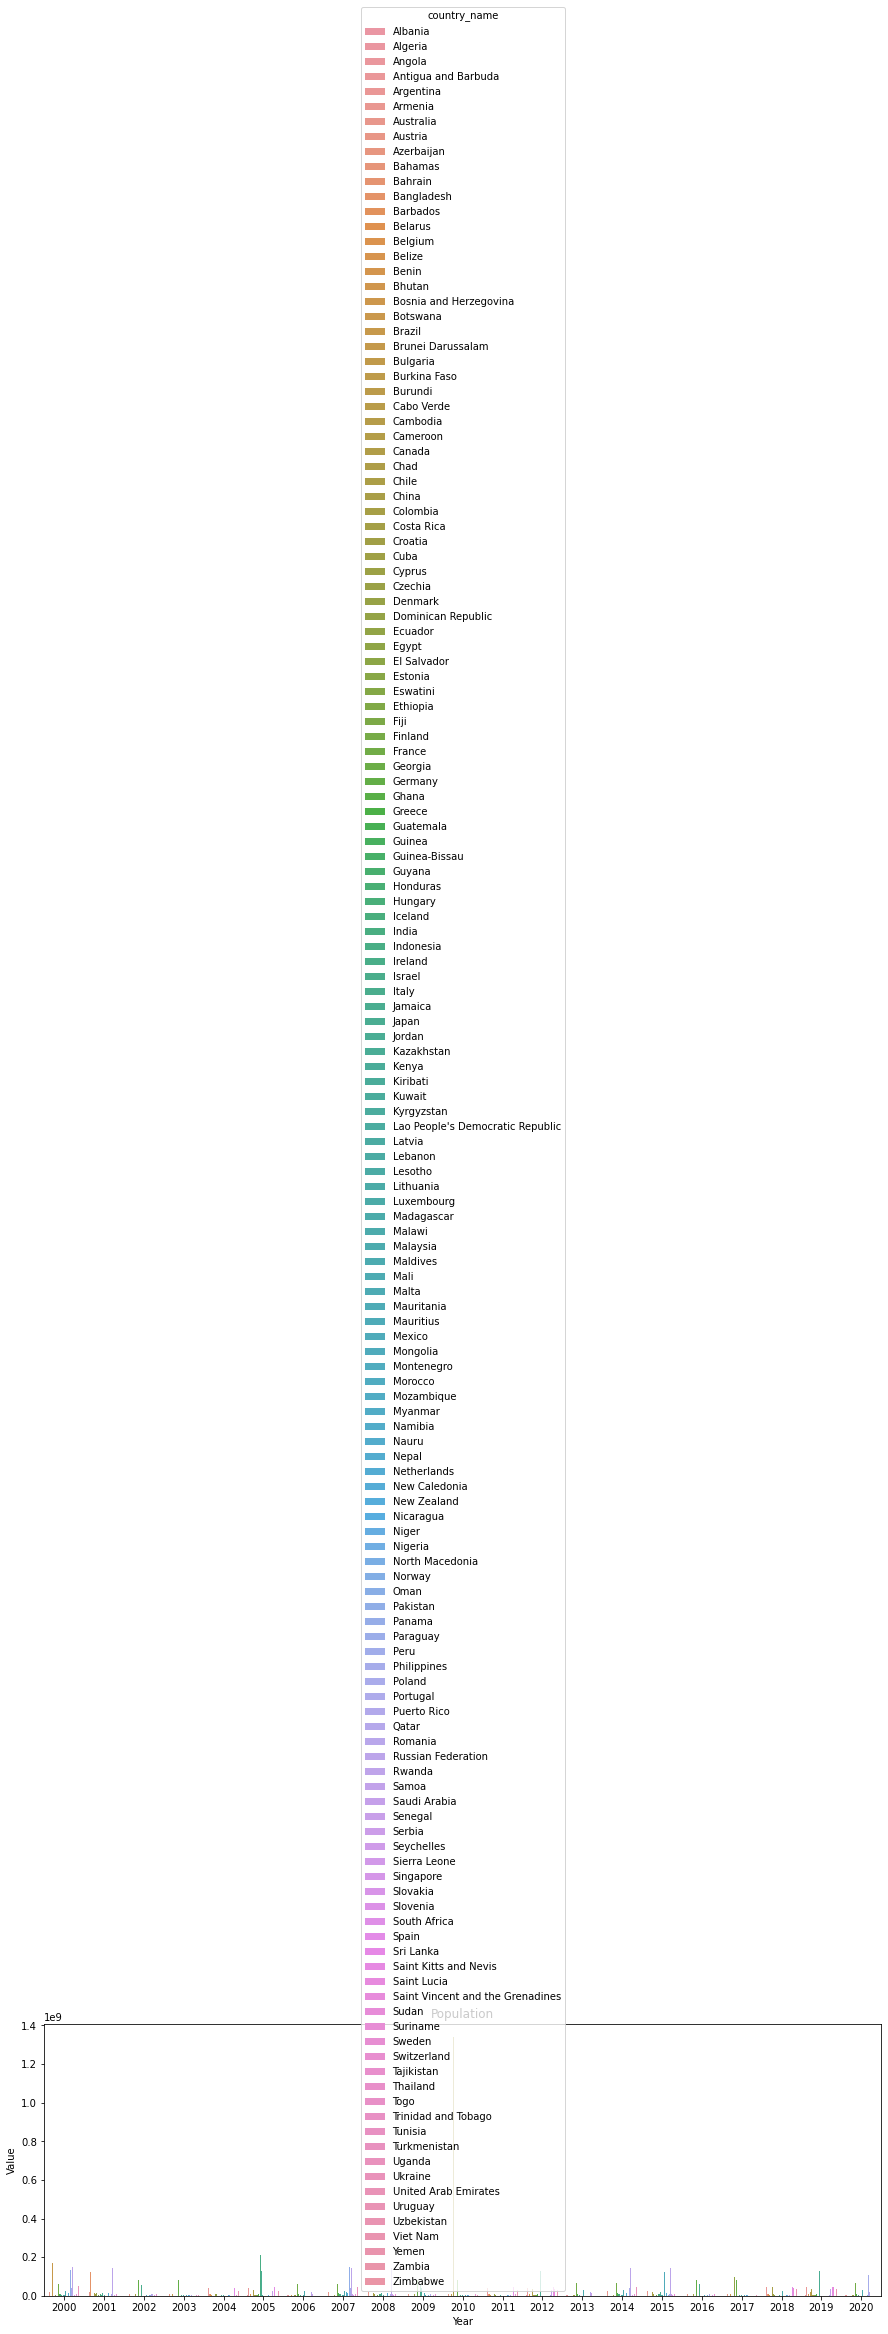

In [39]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=final_data, y='Value', x='Year', hue='country_name')
plt.title('Population')

In [40]:
df_3 = pd.merge(filtered_forest_countries, filtered_food_valid_countries, left_on=['country_name','Year'], right_on=['Area', 'Year'], how='inner')
print(df_3.shape)
df_3.head()

(2268, 7)


,country_name,date,forest coverage %,continent,Year,Area,Value
0,Afghanistan,2020,1.852782,Asia,2020,Afghanistan,7473940.0
1,Afghanistan,2019,1.852782,Asia,2019,Afghanistan,6517801.0
2,Afghanistan,2018,1.852782,Asia,2018,Afghanistan,4747021.0
3,Afghanistan,2017,1.852782,Asia,2017,Afghanistan,5843981.0
4,Afghanistan,2016,1.852782,Asia,2016,Afghanistan,6859148.0


In [41]:
df_4 = pd.merge(df_3, filtered_population_valid_countries, left_on=['country_name','Year'], right_on=['Country or Area', 'Year'], how='inner')
print(df_4.shape)
df_4.head()

(1176, 9)


,country_name,date,forest coverage %,continent,Year,Area,Value_x,Country or Area,Value_y
0,Albania,2020,28.791971,Europe,2020,Albania,491519.0,Albania,2841902.0
1,Albania,2019,28.791971,Europe,2019,Albania,490371.0,Albania,2858309.0
2,Albania,2018,28.791971,Europe,2018,Albania,499161.0,Albania,2868350.0
3,Albania,2017,28.792062,Europe,2017,Albania,507926.0,Albania,2875024.0
4,Albania,2016,28.802190,Europe,2016,Albania,504321.0,Albania,2881063.5


In [42]:
df_4_final=df_4.rename(columns={'Value_x':'Area harvested - ha','Value_y':'Population' })
df_4_final.head()

,country_name,date,forest coverage %,continent,Year,Area,Area harvested - ha,Country or Area,Population
0,Albania,2020,28.791971,Europe,2020,Albania,491519.0,Albania,2841902.0
1,Albania,2019,28.791971,Europe,2019,Albania,490371.0,Albania,2858309.0
2,Albania,2018,28.791971,Europe,2018,Albania,499161.0,Albania,2868350.0
3,Albania,2017,28.792062,Europe,2017,Albania,507926.0,Albania,2875024.0
4,Albania,2016,28.802190,Europe,2016,Albania,504321.0,Albania,2881063.5


In [61]:
CAN = df_4_final['country_name'] == 'Canada'
CAN_df_4 = df_4_final[CAN]

Text(0.5, 1.0, 'forest coverage %')

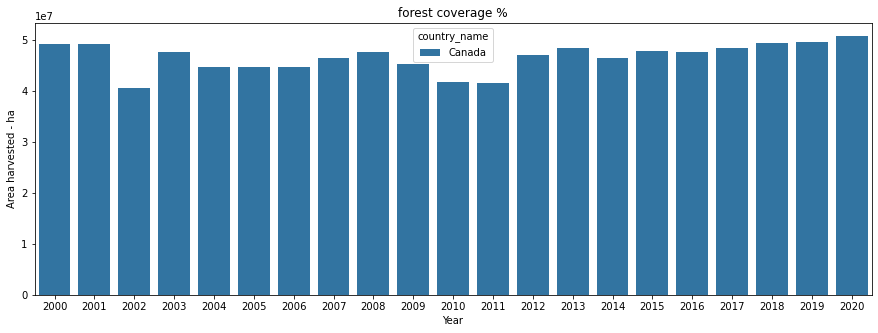

In [64]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=CAN_df_4, y='Area harvested - ha', x='Year', hue='country_name')
plt.title('forest coverage %')

In [45]:
df_4.to_csv('df_4.csv')

In [54]:
df_4_final_continents = df_4_final.groupby(['Year', 'continent']).sum('value')
df_4_final_continents.reset_index(inplace=True)
df_4_final_continents.head()

,Year,continent,forest coverage %,Area harvested - ha,Population
0,2000,Africa,20.655172,153449.0,1.182860e+06
1,2000,Asia,221.949739,46391173.0,2.184392e+08
2,2000,Europe,1068.656437,198850319.0,5.027000e+08
3,2000,North America,149.946490,55103762.0,5.190162e+07
4,2000,Oceania,109.656875,42553730.0,2.381444e+07


Text(0.5, 1.0, 'Population')

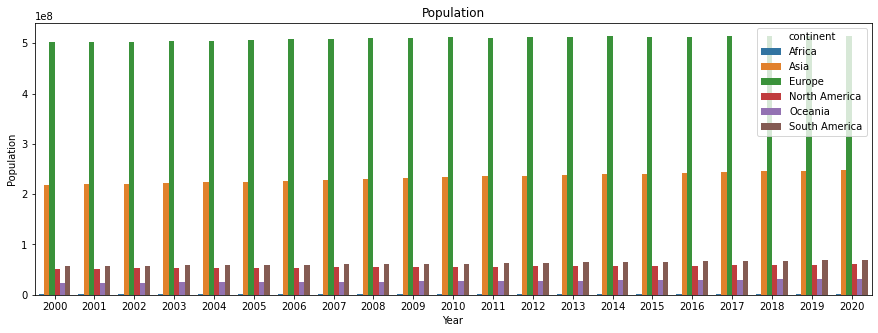

In [55]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(data=df_4_final_continents, y='Population', x='Year', hue='continent')
plt.title('Population')